### TensorFlow MNIST 學習

In [16]:
'''
http://www.tensorfly.cn/tfdoc/tutorials/mnist_beginners.html
NIST 是 Mixed National Institute of Standards and Technology database 的簡稱 http://yann.lecun.com/exdb/mnist/
MNIST 是一個數據庫，這個數據庫中存儲了各個國家地區，不同標準的手寫數字，存儲的內容都是結果標準化處理了的，專門用於關於手寫體識別
MNIST 數據集來自美國國家標準與技術研究所, National Institute of Standards and Technology (NIST)
訓練集 (training set) 由來自 250 個不同人手寫的數字構成, 其中 50% 是高中學生, 50% 來自人口普查局 (the Census Bureau) 的工作人員
測試集(test set) 也是同樣比例的手寫數字數據.

MNIST 數據集可在 http://yann.lecun.com/exdb/mnist/ 獲取, 它包含了四個部分:
訓練圖片集合: train-images-idx3-ubyte.gz (包含 60,000 個圖片樣本)
訓練標籤集合: train-labels-idx1-ubyte.gz (包含 60,000 個數字標籤)
測試圖片集合: t10k-images-idx3-ubyte.gz (包含 10,000 個圖片樣本)
測試標籤集合: t10k-labels-idx1-ubyte.gz (包含 10,000 個數字標籤)

mnist.train.image: 是一個 ndarray，裡面每一個元素是用來訓練的圖片數據
mnist.train.image[index]: 是一個大小為 (784, ) 的 ndarray
裡面每一個元素代表這個圖片【標準化為 28*28 大小的正方形】在每個像素框中的像素值【或者是灰度值】

mnist.train.labels: 是一個 ndarray，裡面的每一個元素指 mnist.train.image 中根據下標對應的圖片真實代表值
mnist.train.labels[index]: 是一個大小為 (10, ) 的 ndarray
裡面每一個元素只有 0，1 兩種取值，代表了 mnist.train.image[index] 這個圖片對應的真實值
'''

'\nhttp://www.tensorfly.cn/tfdoc/tutorials/mnist_beginners.html\nNIST 是 Mixed National Institute of Standards and Technology database 的簡稱 http://yann.lecun.com/exdb/mnist/\nMNIST 是一個數據庫，這個數據庫中存儲了各個國家地區，不同標準的手寫數字，存儲的內容都是結果標準化處理了的，專門用於關於手寫體識別\nMNIST 數據集來自美國國家標準與技術研究所, National Institute of Standards and Technology (NIST)\n訓練集 (training set) 由來自 250 個不同人手寫的數字構成, 其中 50% 是高中學生, 50% 來自人口普查局 (the Census Bureau) 的工作人員\n測試集(test set) 也是同樣比例的手寫數字數據.\n\nMNIST 數據集可在 http://yann.lecun.com/exdb/mnist/ 獲取, 它包含了四個部分:\n訓練圖片集合: train-images-idx3-ubyte.gz (包含 60,000 個圖片樣本)\n訓練標籤集合: train-labels-idx1-ubyte.gz (包含 60,000 個數字標籤)\n測試圖片集合: t10k-images-idx3-ubyte.gz (包含 10,000 個圖片樣本)\n測試標籤集合: t10k-labels-idx1-ubyte.gz (包含 10,000 個數字標籤)\n\nmnist.train.image: 是一個 ndarray，裡面每一個元素是用來訓練的圖片數據\nmnist.train.image[index]: 是一個大小為 (784, ) 的 ndarray\n裡面每一個元素代表這個圖片【標準化為 28*28 大小的正方形】在每個像素框中的像素值【或者是灰度值】\n\nmnist.train.labels: 是一個 ndarray，裡面的每一個元素指 mnist.train.image 中根據下標對應的圖片真實代表值\nmnist.train.labels[index]: 是一個大小為 (10, ) 的

### 載入工具

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from PIL import Image
import random
import math

### 資料：訓練集、標籤集

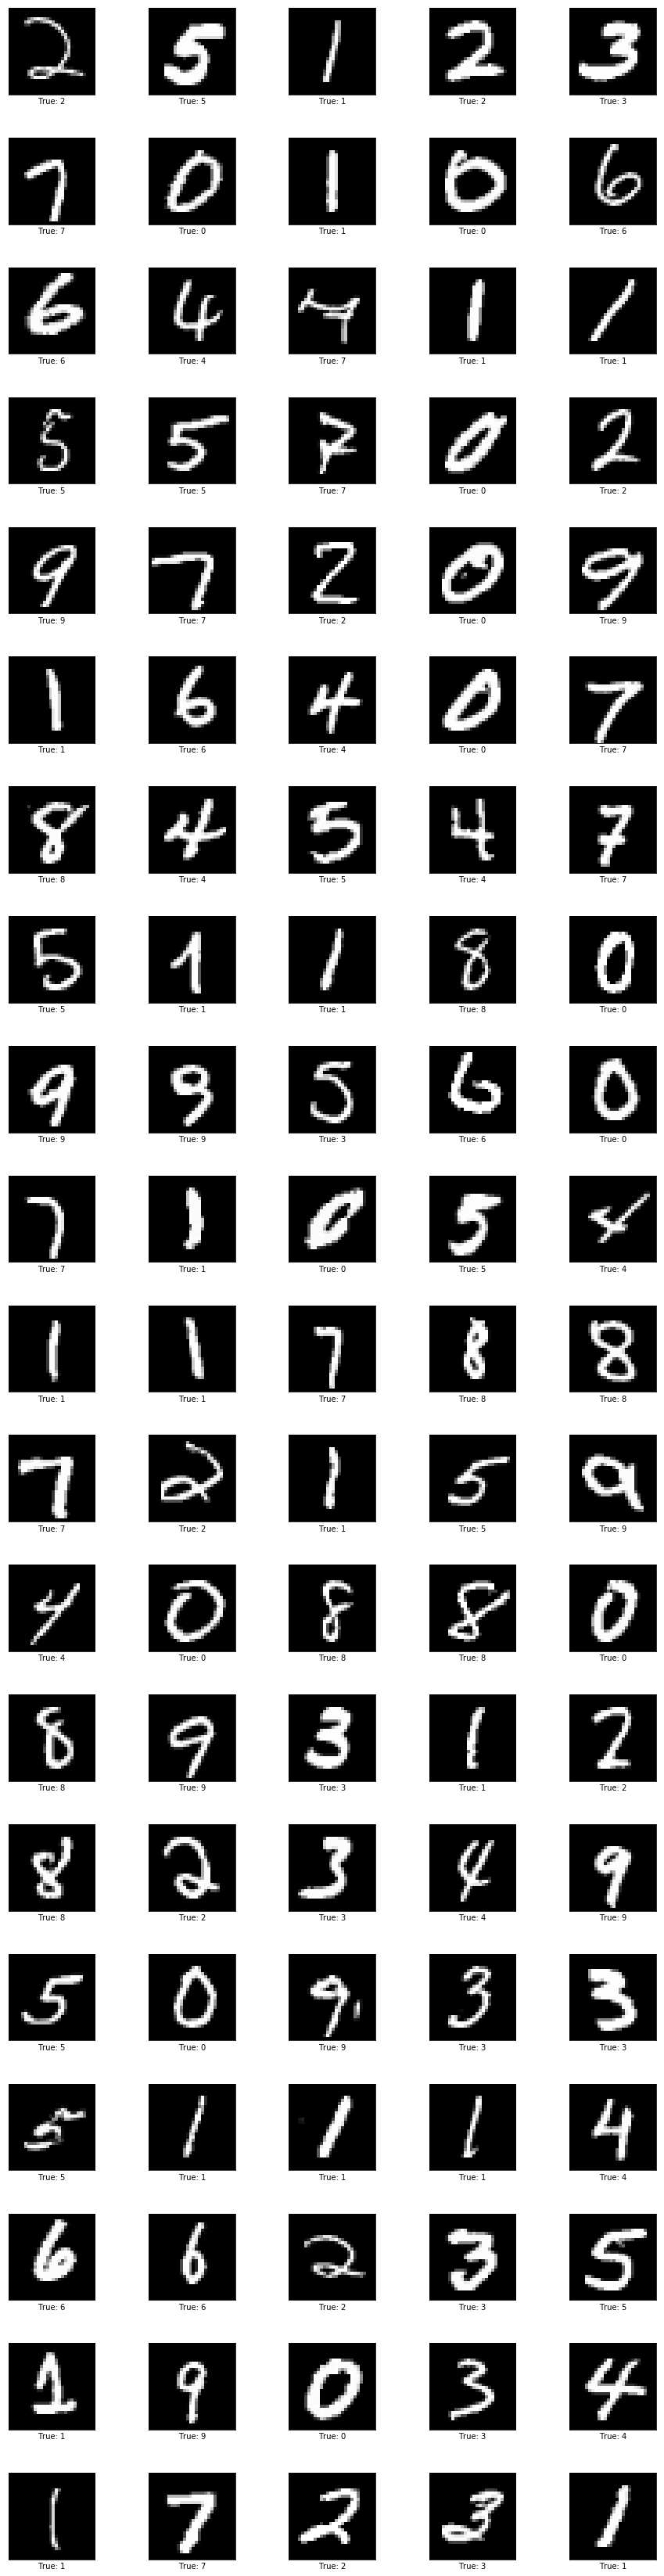

In [4]:
num = 100
row = int(math.ceil(num/5))

fig, axes = plt.subplots(row, 5, figsize=(5*3, row*3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    r = random.randint(0, mnist.train.num_examples - 1)
    x_test_random = mnist.train.images[r:r+1]
    y_test_random = mnist.train.labels[r:r+1]
    ax.imshow(x_test_random.reshape(28, 28), cmap="gray")
    ax.set_xlabel("True: {0}".format(np.argmax(y_test_random, 1)[0]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### 建構 Tensorflow 的 Graph

In [5]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

# hypothesis = tf.layers.dense(x, 10)
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=hypothesis))
# hypothesis = tf.nn.softmax(hypothesis)

x_img = tf.reshape(x, [-1, 28, 28, 1])
conv1 = tf.layers.conv2d(inputs=x_img, filters=32, kernel_size=[5,5], padding="SAME", activation=tf.nn.relu, name='conv1')
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], padding="SAME", strides=2)
dropout1 = tf.layers.dropout(inputs=pool1, rate=0.7)

conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[5,5], padding="SAME", activation=tf.nn.relu, name='conv2')
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], padding="SAME", strides=2)
dropout2 = tf.layers.dropout(inputs=pool2, rate=0.7)

conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3,3], padding="SAME", activation=tf.nn.relu, name='conv3')
pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2,2], padding="SAME", strides=2)
dropout3 = tf.layers.dropout(inputs=pool3, rate=0.7)

layer_flat = tf.reshape(dropout3, [-1, 4*4*128])
layer_4 = tf.layers.dense(layer_flat, 1024)
layer_5 = tf.layers.dense(layer_4, 1024)

hypothesis = tf.layers.dense(layer_5, 10)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=hypothesis))
hypothesis = tf.nn.softmax(hypothesis)

h_class = tf.argmax(hypothesis, 1)
y_class = tf.argmax(y, 1)
correct = tf.cast(tf.equal(h_class, y_class), tf.float32) 
accuracy = tf.reduce_mean(correct)

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### 建 Session、初始變數

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

### 開始訓練

In [7]:
training_epochs = 5
batch_size = 100

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    c_sum = 0.
    for batch in range(total_batch):
        x_train_batch, y_train_batch = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, train], feed_dict={x:x_train_batch, y:y_train_batch})
        c_sum += c
    avg_cost = float(c_sum/total_batch)
    a_ = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
    print("epoch:%4d" % epoch, "cost:%.9f" % avg_cost, 'accuracy:%9f' % a_)

epoch:   0 cost:0.829096350 accuracy: 0.940100
epoch:   1 cost:0.175797564 accuracy: 0.962300
epoch:   2 cost:0.120350488 accuracy: 0.970500
epoch:   3 cost:0.096305158 accuracy: 0.975400
epoch:   4 cost:0.081607451 accuracy: 0.978300


### 預測新資料

(256, 256)


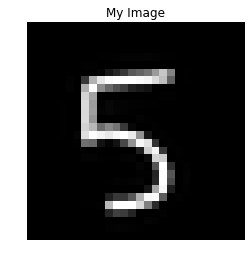

Predicted class : [5]


In [18]:
im = Image.open("./my_image1.png")
print(np.array(im).shape)

im = im.resize((28, 28), Image.ANTIALIAS) #resize the image
im = np.array(im) #convert to an array
im2 = im/np.max(im).astype(float) #normalise input

plt.imshow(im2, cmap='gray')
plt.title('My Image')
plt.axis('off')
plt.show()

test_image = np.reshape(im2, [1,784]) # reshape it to our input placeholder shape

h_ = sess.run(h_class, feed_dict={x:test_image})
print("Predicted class : {}" .format(h_))

### Confusion Matrix 混淆矩陣

[[ 973    0    3    0    0    2    7    0    7    4]
 [   0 1124    1    0    0    0    3    4    0    6]
 [   1    4 1022    1    3    1    0   18    9    3]
 [   0    0    2 1003    1   16    1    8   12   16]
 [   0    0    0    0  968    0    4    1    4    9]
 [   0    0    0    1    0  870    5    0    5    1]
 [   2    1    0    0    5    1  938    0    3    0]
 [   1    0    2    3    1    1    0  990    1    3]
 [   3    6    2    2    2    1    0    2  931    3]
 [   0    0    0    0    2    0    0    5    2  964]]


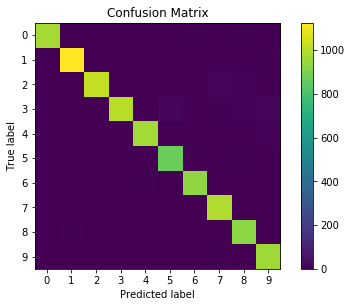

In [9]:
#Confusion Matrix
h_class_test = sess.run(h_class, feed_dict={x: mnist.test.images})
y_class_test = sess.run(y_class, feed_dict={y: mnist.test.labels})
cm = confusion_matrix(h_class_test, y_class_test)
print(cm)

#Plotting confusion Matrix
plt.imshow(cm, interpolation='nearest')
plt.colorbar()
number_of_class = len(np.unique(y_class_test))
tick_marks = np.arange(len(np.unique(y_class_test)))
plt.xticks(tick_marks, range(number_of_class))
plt.yticks(tick_marks, range(number_of_class))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

### 查找錯誤

total num: 10000
error num: 217


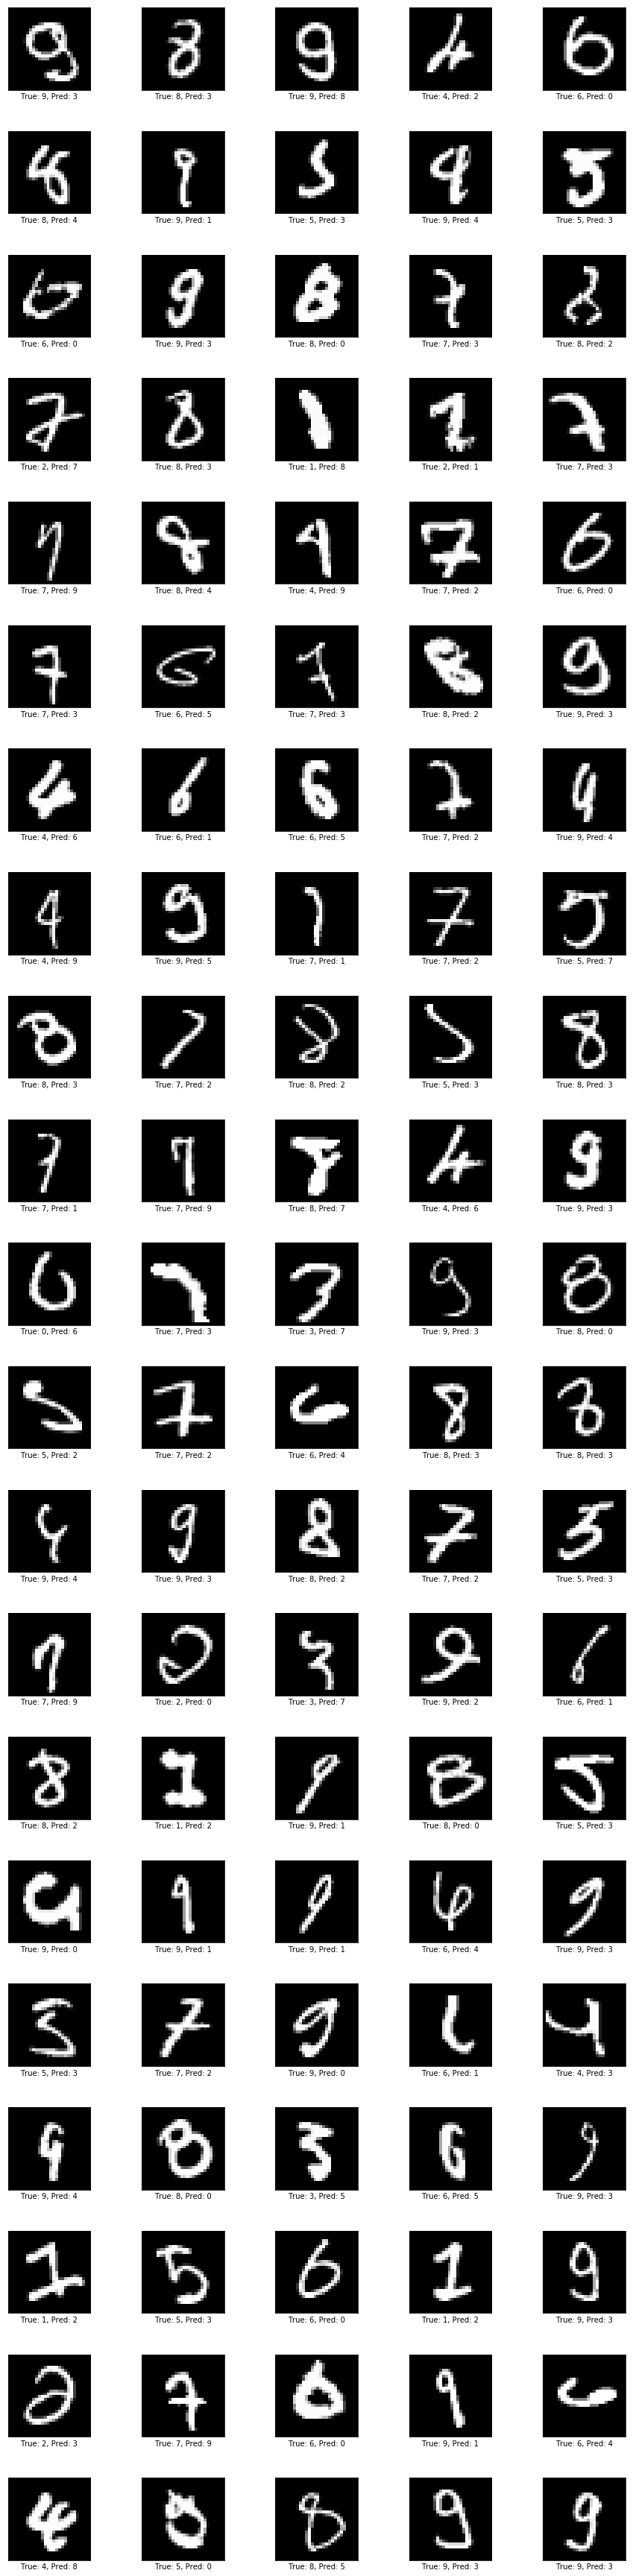

In [10]:
#Finding error outputs
idx = h_class_test == y_class_test
cmp = np.where(idx == False) #indices of error outputs
print('total num:', idx.shape[0])
print('error num:', len(cmp[0]))

# plotting errors
num = len(cmp[0])
num = 102
row = int(math.ceil(num/5))

fig, axes = plt.subplots(row, 5, figsize=(5*3, row*3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
cls_true = y_class_test[cmp]
cls_pred = h_class_test[cmp]
images = mnist.test.images[cmp]

for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28,28), cmap='gray')
        xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])  
plt.show()

In [11]:
# grabbing the default graph
g = tf.get_default_graph()

# every operations in our graph
[op.name for op in g.get_operations()]

['Placeholder',
 'Placeholder_1',
 'Reshape/shape',
 'Reshape',
 'conv1/kernel/Initializer/random_uniform/shape',
 'conv1/kernel/Initializer/random_uniform/min',
 'conv1/kernel/Initializer/random_uniform/max',
 'conv1/kernel/Initializer/random_uniform/RandomUniform',
 'conv1/kernel/Initializer/random_uniform/sub',
 'conv1/kernel/Initializer/random_uniform/mul',
 'conv1/kernel/Initializer/random_uniform',
 'conv1/kernel',
 'conv1/kernel/Assign',
 'conv1/kernel/read',
 'conv1/bias/Initializer/zeros',
 'conv1/bias',
 'conv1/bias/Assign',
 'conv1/bias/read',
 'conv1/dilation_rate',
 'conv1/Conv2D',
 'conv1/BiasAdd',
 'conv1/Relu',
 'max_pooling2d/MaxPool',
 'dropout/Identity',
 'conv2/kernel/Initializer/random_uniform/shape',
 'conv2/kernel/Initializer/random_uniform/min',
 'conv2/kernel/Initializer/random_uniform/max',
 'conv2/kernel/Initializer/random_uniform/RandomUniform',
 'conv2/kernel/Initializer/random_uniform/sub',
 'conv2/kernel/Initializer/random_uniform/mul',
 'conv2/kernel/Ini

### 卷積層filter所認的特徵

(1, 28, 28, 32)


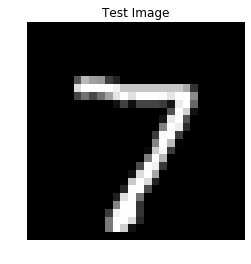

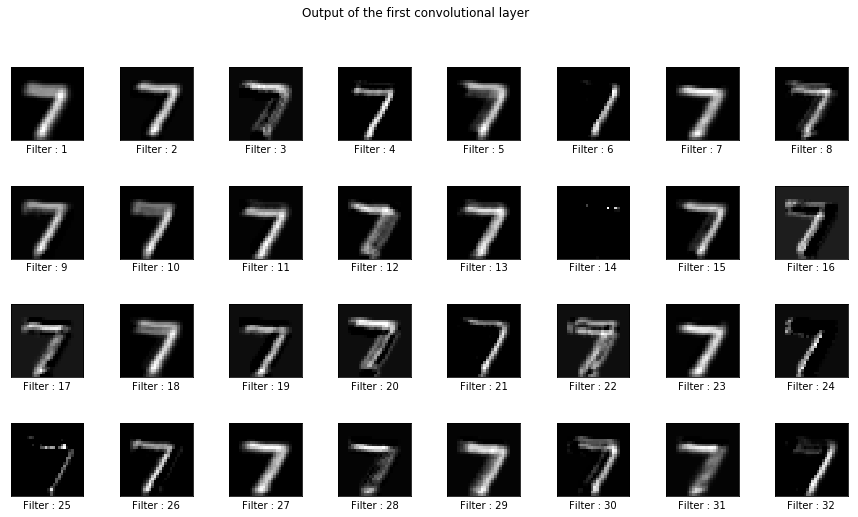

In [12]:
test_image = np.reshape(mnist.test.images[0], [1,784])
conv1_ = sess.run(conv1, feed_dict={x: test_image})
print(conv1_.shape)

plt.imshow(np.reshape(test_image, [28,28]), cmap='gray')
plt.title('Test Image')
plt.axis('off')
plt.show()

conv1_img_ = conv1_[0,:,:,:]
fig, axes = plt.subplots(4, 8, figsize=(15,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(conv1_img_[:,:,i], cmap='gray')
    xlabel = "Filter : {}".format(i+1)
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])      
fig.suptitle('Output of the first convolutional layer')  
plt.show()

(1, 14, 14, 64)


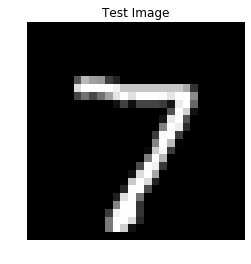

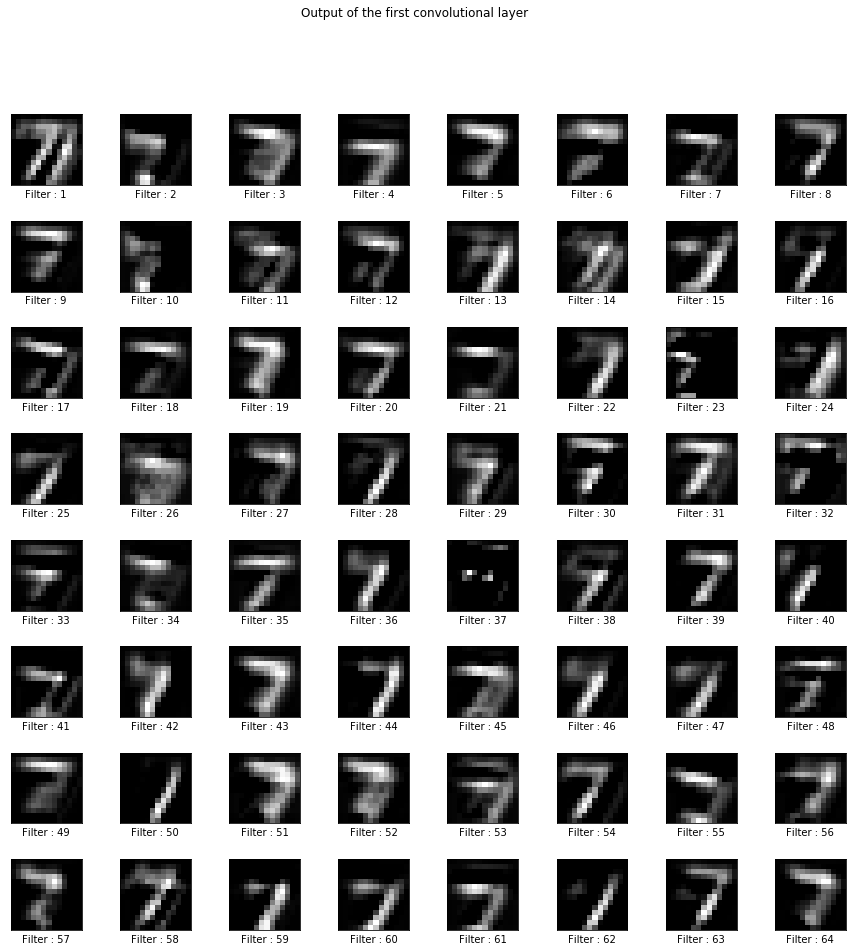

In [13]:
test_image = np.reshape(mnist.test.images[0], [1,784])
conv2_ = sess.run(conv2, feed_dict={x: test_image})
print(conv2_.shape)

plt.imshow(np.reshape(test_image, [28,28]), cmap='gray')
plt.title('Test Image')
plt.axis('off')
plt.show()

conv2_img_ = conv2_[0,:,:,:]
fig, axes = plt.subplots(8, 8, figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(conv2_img_[:,:,i], cmap='gray')
    xlabel = "Filter : {}".format(i+1)
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])      
fig.suptitle('Output of the first convolutional layer')  
plt.show()

(1, 7, 7, 128)


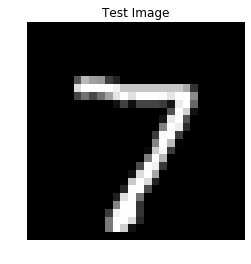

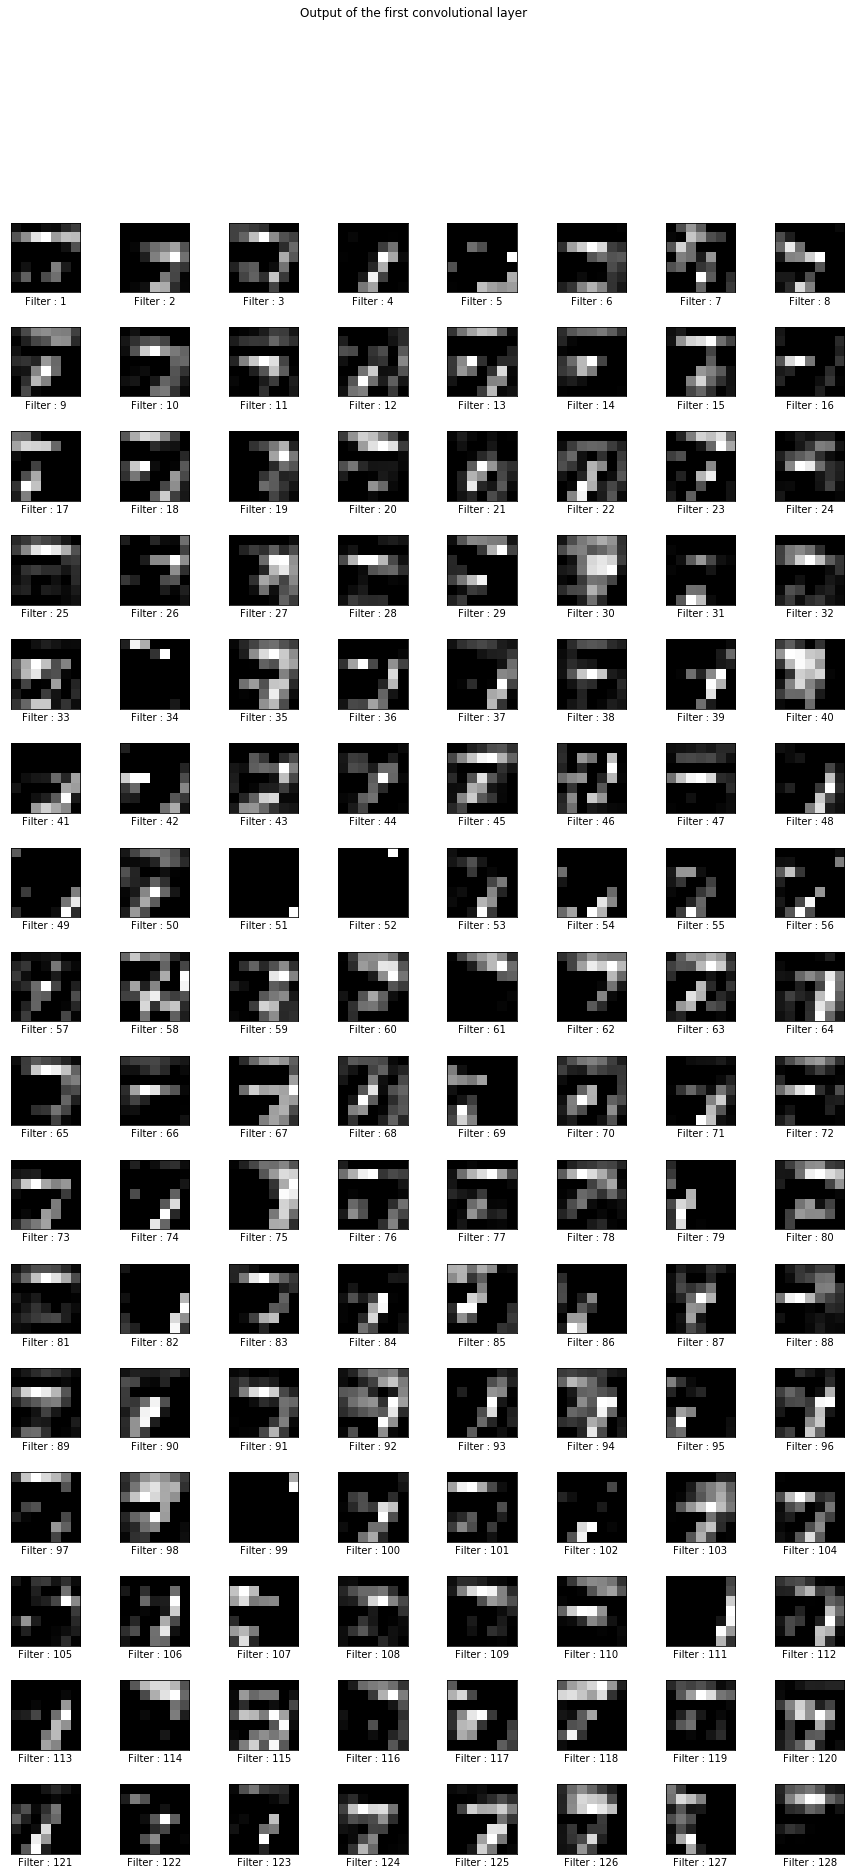

In [14]:
test_image = np.reshape(mnist.test.images[0], [1,784])
conv3_ = sess.run(conv3, feed_dict={x: test_image})
print(conv3_.shape)

plt.imshow(np.reshape(test_image, [28,28]), cmap='gray')
plt.title('Test Image')
plt.axis('off')
plt.show()

conv3_img_ = conv3_[0,:,:,:]
fig, axes = plt.subplots(16, 8, figsize=(15,30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(conv3_img_[:,:,i], cmap='gray')
    xlabel = "Filter : {}".format(i+1)
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])      
fig.suptitle('Output of the first convolutional layer')  
plt.show()